# EcoFOCIpy ADCP QC - 20BSP-4A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('20bsp4a_0058m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 5898, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-05 ... 2021-05-08T17:00:00
  * depth            (depth) float64 -16.0 -12.0 -8.0 -4.0 ... 44.0 48.0 52.0
  * latitude         (latitude) float64 57.86
  * longitude        (longitude) float64 -168.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 -32.34 ... -5...
    v_curr_comp      (latitude, longitude, time, depth) float64 16.5 ... 0.9541
    w_curr_comp      (latitude, longitude, time, depth) float64 3.5 7.8 ... -4.2
    w_curr_comp_err  (latitude, longitude, time, depth) float64 9.1 6.9 ... 0.3
    agc1             (latitude, longitude, time, depth) float64 81.0 ... 104.0
    agc2             (latitude, longitude, time, depth) float64 79.0 ... 112.0
    agc3             (latitude, longitude, time, depth) float64 81.0 ... 109.0
    agc4             (latitude, longitude, time, depth) float64 79.0 ... 107.0
Attributes: (12/13)
    Latitude_DegMMddW:                      57 51.894 N
    Longitude_DegMMddN:                     168 52.759 W
    MooringID:                              20BSP-4A
    platform_deployment_date:               2020-09-03T13:19:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2021-05-08T17:31:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             71.3
    date_created:                           2022-06-08T15:58:01Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

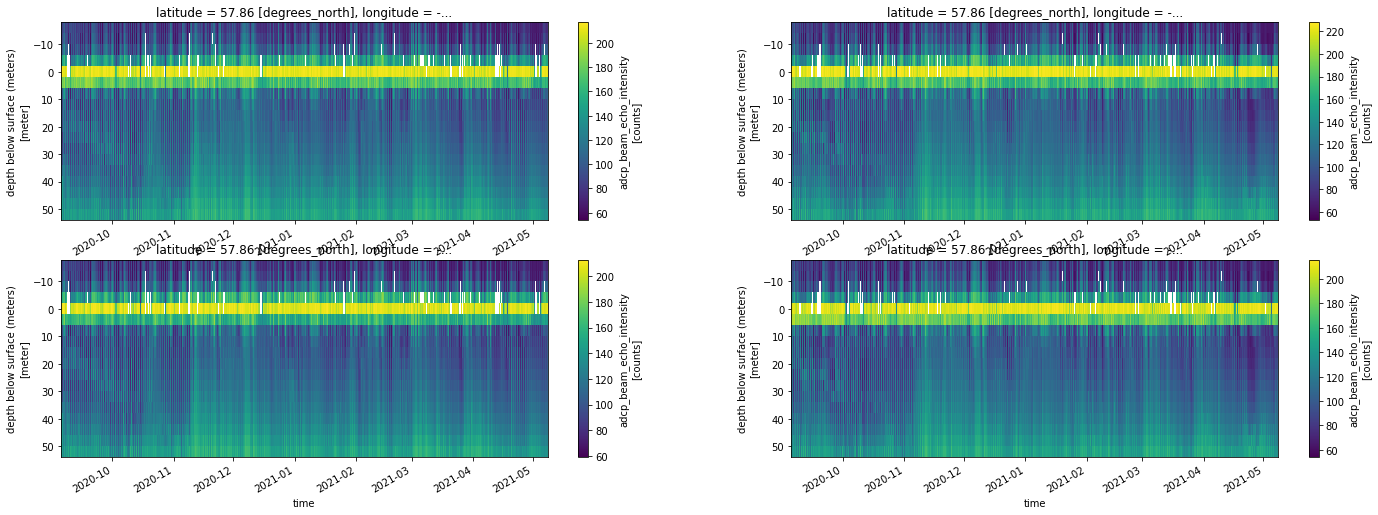

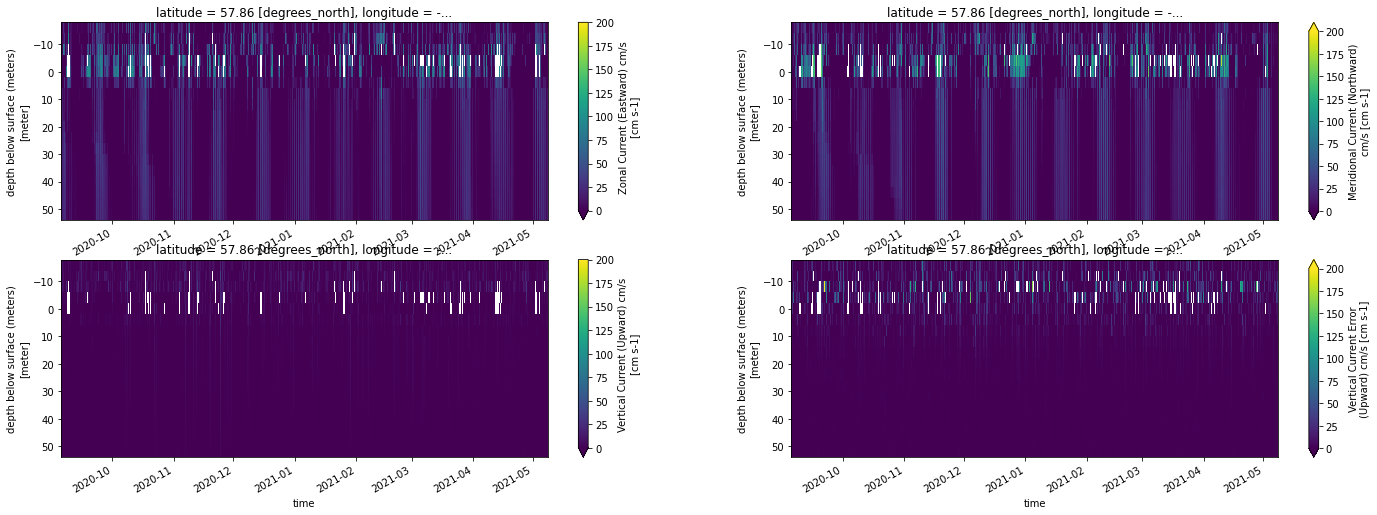

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('20bsp4a_0058m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('20bsp4a_0058m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

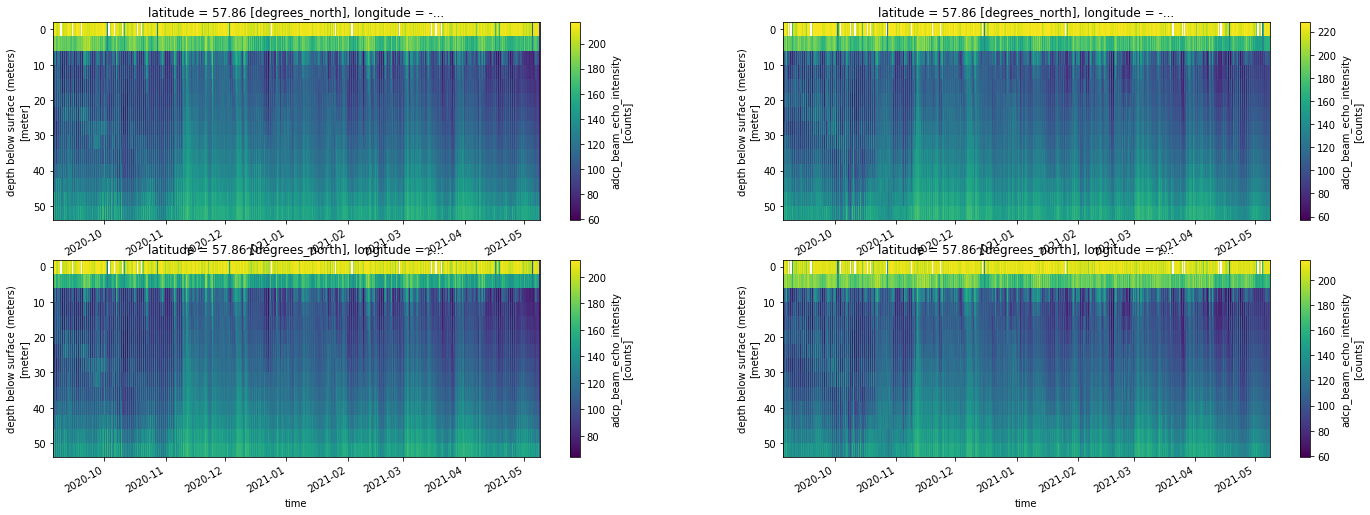

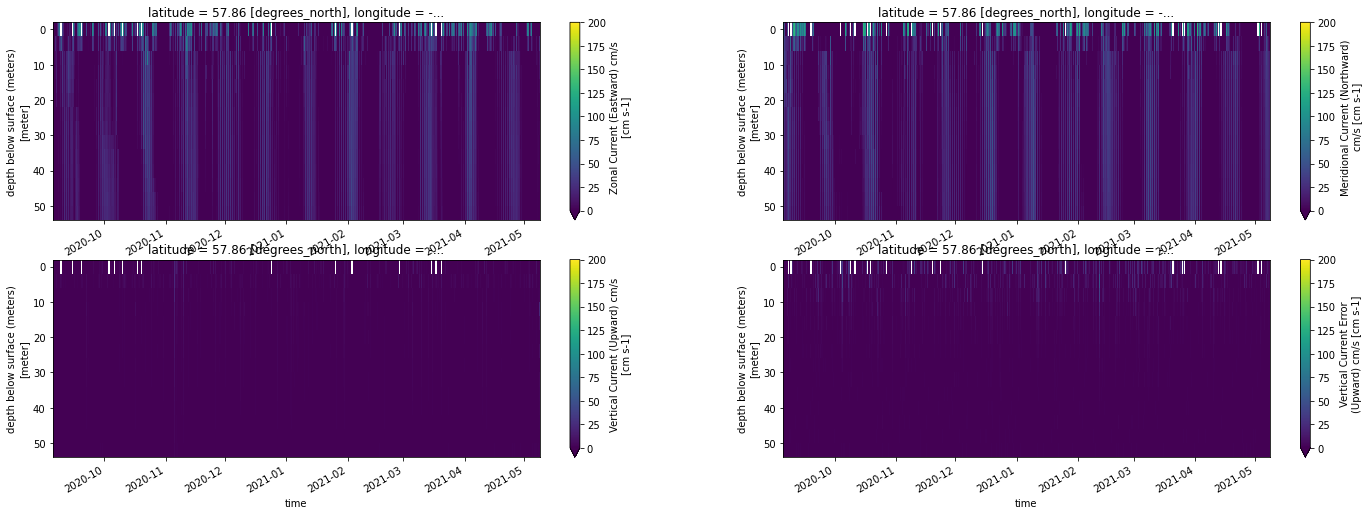

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [14]:
ixdf.to_netcdf('20bsp4a_0058m.filtered.nc')